In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import heatmap

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

In [4]:
csv_path = "../../results/sslvr-action_classification_finegym_all.csv"

In [5]:
df = pd.read_csv(csv_path)
df.dropna(inplace=True)

In [6]:
df

,Unnamed: 0,Gym99,Unnamed: 2,Gym288,Unnamed: 4,Vault (6),Unnamed: 6,FX,Unnamed: 8,FX-S1 (11),Unnamed: 10,UB-S1,Unnamed: 12
1,None,89.41,84.4,84.71,50.01,41.26,24.67,79.16,75.88,50.32,44.98,88.44,83.98
2,SeLaVi,88.93,84.75,83.68,52.82,43.72,25.44,80.01,76.04,57.92,50.15,85.11,81.46
3,RSPNet,89.88,84.85,84.45,50.53,45.29,31.37,81.49,77.69,68.85,61.07,88.85,83.67
4,VideoMoCo,90.54,86.36,85.31,54.07,45.74,27.78,84.19,79.52,68.6,60.39,87.9,82.07
5,Pretext-contrast,90.31,85.7,85.42,52.66,46.19,28.48,84.68,81.37,72.84,65.78,90.62,86.24
6,CTP,92.17,88.33,87.33,56.51,44.17,26.83,88.99,86.16,84.68,79.66,92.32,88.44
7,TCLR,91.49,87.97,86.93,55.37,46.19,29.84,87.38,84.25,69.63,61.02,90.48,85.29
8,GDT,90.36,86.46,85.74,55.36,44.62,33.11,85.8,83.64,72.84,65.72,88.17,81.62
9,Supervised,91.77,88,87.63,58.4,49.33,37.65,88.95,86.09,84.68,80.98,90.55,86.89


In [7]:
df = df.rename(
    columns={
        "Unnamed: 0": "Method",
        "Gym99": "Gym99 (video)",
        "Unnamed: 2": "Gym99 (class)",
        "Gym288": "Gym288 (video)",
        "Unnamed: 4": "Gym288 (class)",
        "Vault (6)": "Vault (6) (video)",
        "Unnamed: 6": "Vault (6) (class)",
        "FX": "FX (video)",
        "Unnamed: 8": "FX (class)",
        "FX-S1 (11)": "FX-S1 (11) (video)",
        "Unnamed: 10": "FX-S1 (11) (class)",
        "UB-S1": "UB-S1 (video)",
        "Unnamed: 12": "UB-S1 (class)",
    }
)

In [8]:
df

,Method,Gym99 (video),Gym99 (class),Gym288 (video),Gym288 (class),Vault (6) (video),Vault (6) (class),FX (video),FX (class),FX-S1 (11) (video),FX-S1 (11) (class),UB-S1 (video),UB-S1 (class)
1,None,89.41,84.4,84.71,50.01,41.26,24.67,79.16,75.88,50.32,44.98,88.44,83.98
2,SeLaVi,88.93,84.75,83.68,52.82,43.72,25.44,80.01,76.04,57.92,50.15,85.11,81.46
3,RSPNet,89.88,84.85,84.45,50.53,45.29,31.37,81.49,77.69,68.85,61.07,88.85,83.67
4,VideoMoCo,90.54,86.36,85.31,54.07,45.74,27.78,84.19,79.52,68.6,60.39,87.9,82.07
5,Pretext-contrast,90.31,85.7,85.42,52.66,46.19,28.48,84.68,81.37,72.84,65.78,90.62,86.24
6,CTP,92.17,88.33,87.33,56.51,44.17,26.83,88.99,86.16,84.68,79.66,92.32,88.44
7,TCLR,91.49,87.97,86.93,55.37,46.19,29.84,87.38,84.25,69.63,61.02,90.48,85.29
8,GDT,90.36,86.46,85.74,55.36,44.62,33.11,85.8,83.64,72.84,65.72,88.17,81.62
9,Supervised,91.77,88,87.63,58.4,49.33,37.65,88.95,86.09,84.68,80.98,90.55,86.89


In [9]:
for col in df.columns:
    if col != "Method":
        df[col] = df[col].astype(float)

### Plot video-wise

In [44]:
df_video = df[[x for x in df.columns if "video" in x or "Method" in x]]

In [45]:
df_video = df_video.set_index(keys=["Method"])

In [46]:
df_video.iloc[0]

Gym99 (video)         89.41
Gym288 (video)        84.71
Vault (6) (video)     41.26
FX (video)            79.16
FX-S1 (11) (video)    50.32
UB-S1 (video)         88.44
Name: None, dtype: float64

In [47]:
df_video.index

Index(['None', 'SeLaVi', 'RSPNet', 'VideoMoCo', 'Pretext-contrast', 'CTP',
       'TCLR', 'GDT', 'Supervised'],
      dtype='object', name='Method')

In [48]:
df_video.iloc[0, 1]

84.71

In [49]:
df_video

,Gym99 (video),Gym288 (video),Vault (6) (video),FX (video),FX-S1 (11) (video),UB-S1 (video)
Method,,,,,,
None,89.41,84.71,41.26,79.16,50.32,88.44
SeLaVi,88.93,83.68,43.72,80.01,57.92,85.11
RSPNet,89.88,84.45,45.29,81.49,68.85,88.85
VideoMoCo,90.54,85.31,45.74,84.19,68.60,87.90
Pretext-contrast,90.31,85.42,46.19,84.68,72.84,90.62
CTP,92.17,87.33,44.17,88.99,84.68,92.32
TCLR,91.49,86.93,46.19,87.38,69.63,90.48
GDT,90.36,85.74,44.62,85.80,72.84,88.17
Supervised,91.77,87.63,49.33,88.95,84.68,90.55


In [50]:
df_video.loc["None"]

Gym99 (video)         89.41
Gym288 (video)        84.71
Vault (6) (video)     41.26
FX (video)            79.16
FX-S1 (11) (video)    50.32
UB-S1 (video)         88.44
Name: None, dtype: float64

### Plot normalized

In [51]:
norm_df=(df_video-df_video.loc["None"])/(df_video.loc["Supervised"]-df_video.loc["None"])

In [52]:
norm_df

,Gym99 (video),Gym288 (video),Vault (6) (video),FX (video),FX-S1 (11) (video),UB-S1 (video)
Method,,,,,,
None,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SeLaVi,-0.203390,-0.352740,0.304833,0.086823,0.221187,-1.578199
RSPNet,0.199153,-0.089041,0.499380,0.237998,0.539290,0.194313
VideoMoCo,0.478814,0.205479,0.555143,0.513790,0.532014,-0.255924
Pretext-contrast,0.381356,0.243151,0.610905,0.563841,0.655413,1.033175
CTP,1.169492,0.897260,0.360595,1.004086,1.000000,1.838863
TCLR,0.881356,0.760274,0.610905,0.839632,0.561991,0.966825
GDT,0.402542,0.352740,0.416357,0.678243,0.655413,-0.127962
Supervised,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


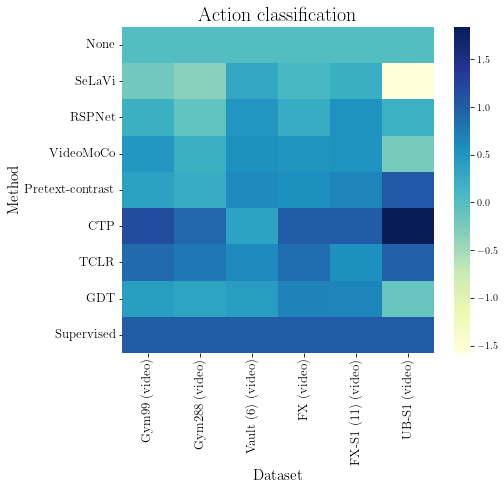

In [53]:
heatmap(norm_df)

### Plot normalized

In [54]:
norm_df=(df_video-df_video.min())/(df_video.max()-df_video.min())

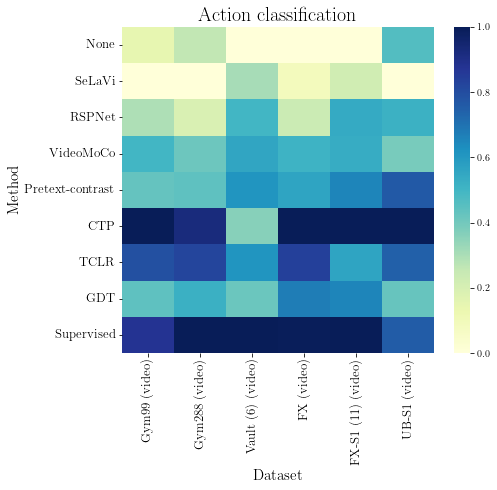

In [55]:
heatmap(norm_df)

### Plot class-wise

In [10]:
df_class = df[[x for x in df.columns if "class" in x or "Method" in x]]
df_class = df_class.set_index(keys=["Method"])

In [11]:
df_class

,Gym99 (class),Gym288 (class),Vault (6) (class),FX (class),FX-S1 (11) (class),UB-S1 (class)
Method,,,,,,
None,84.40,50.01,24.67,75.88,44.98,83.98
SeLaVi,84.75,52.82,25.44,76.04,50.15,81.46
RSPNet,84.85,50.53,31.37,77.69,61.07,83.67
VideoMoCo,86.36,54.07,27.78,79.52,60.39,82.07
Pretext-contrast,85.70,52.66,28.48,81.37,65.78,86.24
CTP,88.33,56.51,26.83,86.16,79.66,88.44
TCLR,87.97,55.37,29.84,84.25,61.02,85.29
GDT,86.46,55.36,33.11,83.64,65.72,81.62
Supervised,88.00,58.40,37.65,86.09,80.98,86.89


In [12]:
norm_df=(df_class-df_class.min())/(df_class.max()-df_class.min())

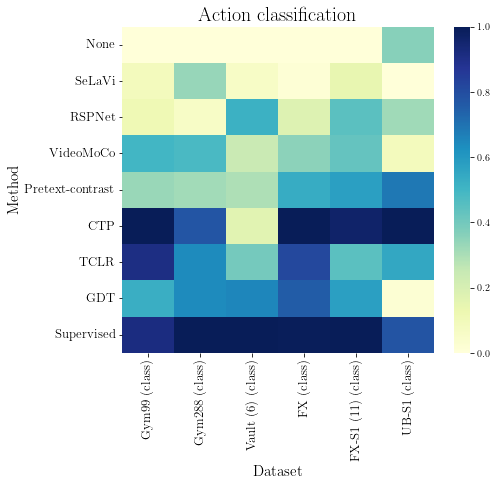

In [13]:
heatmap(norm_df)